In [48]:
def rk21(f, y0,x0,x, n):
    x_cur = x0
    y_cur = y0
    h = (x - x0)/n
    
    for i in range(n):
        k1 = h*f(x_cur, y_cur)
        k2 = h*f(x_cur + h, y_cur + k1)
        y_cur += (k1+k2)/2 
        x_cur += h
    return y_cur
def rk41(f, y0, x0, x, n):
    x_cur = x0
    y_cur = y0
    h = (x-x0)/n
    for i in range(n):
        k1 = h*f(x_cur, y_cur)
        k2 = h*f( x_cur + h/2, y_cur + k1/2)
        k3 = h*f( x_cur + h/2, y_cur + k2/2)
        k4 = h*f( x_cur + h, y_cur + k3)
        y_cur +=  (k1+2*k2+2*k3+k4)/6
        x_cur += h
    return y_cur
# y'(x) = f(x,y(x),z(x))
# z'(x) = g(x, y(x), z(x))
def rk42(f, g, x0, y0, z0, x, n):
    h = (x - x0)/n
    xn = x0
    yn = y0
    zn = z0
    for i in range(n):
        k1 = h*f(xn,yn,zn)
        l1 = h*g(xn, yn, zn)
        k2 = h*f(xn+h/2, yn+k1/2, zn+l1/2)
        l2 = h*g(xn+h/2, yn+k1/2, zn+l1/2)
        k3 = h*f(xn+h/2, yn+k2/2, zn+l2/2)
        l3 = h*g(xn+h/2, yn+k2/2, zn+l2/2)
        k4 = h*f(xn+h, yn+k3, zn+l3)
        l4 = h*g(xn+h, yn+k3, zn+l3)
        k = (k1 + 2*k2 + 2*k3 +k4)/6
        l = (l1 + 2*l2 + 2*l3 +l4)/6
        xn += h
        yn += k
        zn += l
    return (yn,zn)
def rk22(f, g, x0, y0, z0, x, n):
    h = (x - x0)/n
    xn = x0
    yn = y0
    zn = z0
    for i in range(n):
        k1 = h*f(xn,yn,zn)
        l1 = h*g(xn, yn, zn)
        k2 = h*f(xn+h, yn+k1, zn+l1)
        l2 = h*g(xn+h, yn+k1, zn+l1)
    
        k = (k1 + k2)/2
        l = (l1 + l2)/2
        xn += h
        yn += k
        zn += l
    return (yn,zn)
        


# Решение первого уравнения из варианта

In [681]:
import numpy as np
import matplotlib.pyplot as plt
def answer_correct2(x):
    return np.exp(-x*x*(-3+2*x)/6)
def f(x,y):
    return (x-x*x)*y

In [684]:
rk41_answers = [rk41(f, 1, 0,x,10) for x in np.linspace(-2,2,10)]
rk21_answers = [rk21(f, 1, 0, x, 10) for x in np.linspace(-2,2,10)]
true_answers = [answer_correct1(x) for x in np.linspace(-2,2,100)]

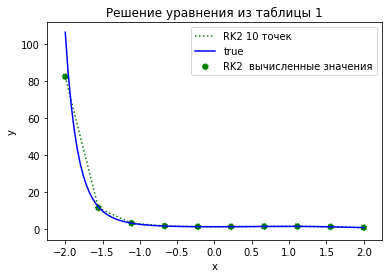

In [689]:
plot_graph("RK2 ", "Решение уравнения из таблицы 1", -2,2,10,rk21_answers,true_answers)

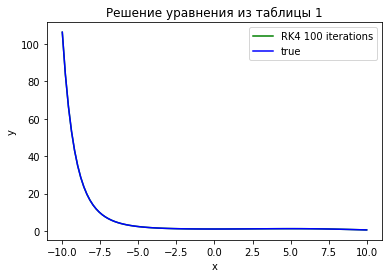

In [71]:
plt.plot(np.linspace(-10,10,100), rk41_answers, color = 'green', label = "RK4 100 iterations")
plt.plot(np.linspace(-10,10,100), true_answers, color = 'blue', label = "true")
plt.title("Решение уравнения из таблицы 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fig11.png", dpi = 400)

In [135]:
rk21_answers[:5], rk41_answers[:5], true_answers[:5]

([106.33764175270281,
  83.78562438844645,
  66.54864066419,
  53.276884180249326,
  42.98442780845217],
 [106.34245450767378,
  83.78885973312335,
  66.5508248176372,
  53.27836450829895,
  42.985434770086734],
 [106.34267539816554,
  83.78899330855742,
  66.55090581738115,
  53.278413746733406,
  42.985464764403865])

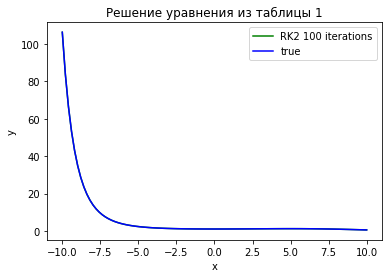

In [136]:
plt.plot(np.linspace(-10,10,100), rk21_answers, color = 'green', label = "RK2 100 iterations")
plt.plot(np.linspace(-10,10,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Решение уравнения из таблицы 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fig12.png", dpi = 400)

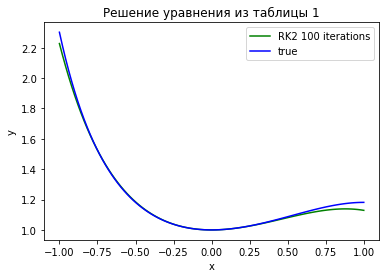

In [76]:
rk21_less_answers = [rk21(f, 1, 0, x, 2) for x in np.linspace(-1,1,100)]
true_less_answers = [answer_correct1(x) for x in np.linspace(-1,1,100)]
plt.plot(np.linspace(-1,1,100), rk21_less_answers, color = 'green', label = "RK2 100 iterations")
plt.plot(np.linspace(-1,1,100), true_less_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Решение уравнения из таблицы 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fig12_.png", dpi = 400)

## Тестирование нахождения решений

In [639]:
# y' = y*y
# y(0) = 1
# answer = 1/(1-x)
def f_test2(x,y):
    return y*y
def answer_test2(x):
    return 1/(1-x)



rk41_answers = [rk41(f_test2, 1, 0, x, 10) for x in np.linspace(-1,0.5,10)]
rk21_answers = [rk21(f_test2, 1, 0, x, 10) for x in np.linspace(-1,0.5,10)]
true_answers = [answer_test2(x) for x in np.linspace(-1,0.5,100)]

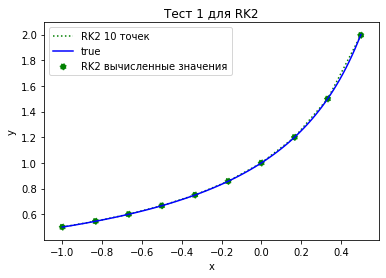

In [641]:
plt.plot( np.linspace(-1,0.5,10), rk21_answers, color = 'green', label = "RK2 10 точек", linestyle = 'dotted')
plt.scatter( np.linspace(-1,0.5,10), rk21_answers, color = 'green', label = "RK2 вычисленные значения", linestyle = 'dotted')
plt.plot( np.linspace(-1,0.5,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 1 для RK2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("NEWfig1test_1.png", dpi = 400)

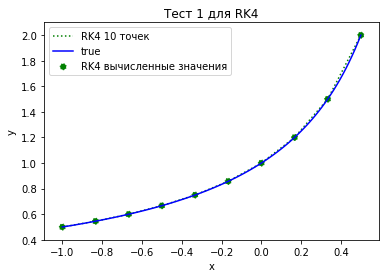

In [642]:
plt.plot( np.linspace(-1,0.5,10), rk41_answers, color = 'green', label = "RK4 10 точек", linestyle = 'dotted')
plt.scatter( np.linspace(-1,0.5,10), rk41_answers, color = 'green', label = "RK4 вычисленные значения", linestyle = 'dotted')
plt.plot( np.linspace(-1,0.5,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 1 для RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("NEWfig2test_1.png", dpi = 400)

In [138]:
rk21_answers[:5], rk41_answers[:5], true_answers[:5]

([0.5006712212827543,
  0.5044721947355518,
  0.5083319159867905,
  0.5122517544626493,
  0.5162331224228577],
 [0.500000297580231,
  0.5038170773752372,
  0.5076925774864094,
  0.5116281634901652,
  0.5156252436371249],
 [0.5, 0.5038167938931297, 0.5076923076923077, 0.5116279069767442, 0.515625])

In [643]:
# y' = y/x
# y(1) = 1
# answer = x
def f_test3(x,y):
    return y/x
def answer_test3(x):
    return x



rk41_answers = [rk41(f_test3, 1, 1, x, 10) for x in np.linspace(2,5,10)]
rk21_answers = [rk21(f_test3, 1, 1, x, 10) for x in np.linspace(2,5,10)]
true_answers = [answer_test3(x) for x in np.linspace(2,5,100)]

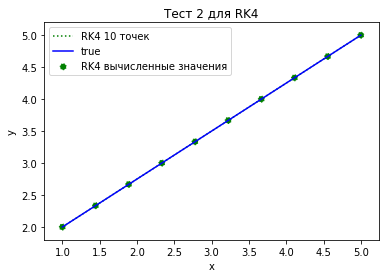

In [645]:
plt.plot( np.linspace(1,5,10), rk41_answers, color = 'green', label = "RK4 10 точек", linestyle = 'dotted')
plt.scatter( np.linspace(1,5,10), rk41_answers, color = 'green',label = "RK4 вычисленные значения", linestyle = 'dotted')
plt.plot( np.linspace(1,5,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 2 для RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("NEWRK4_2.png", dpi = 400)

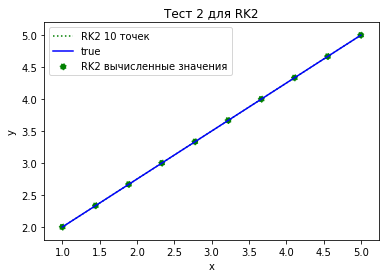

In [646]:
plt.plot( np.linspace(1,5,10), rk21_answers, color = 'green', label = "RK2 10 точек", linestyle = 'dotted')
plt.scatter( np.linspace(1,5,10), rk21_answers, color = 'green',label = "RK2 вычисленные значения", linestyle = 'dotted')
plt.plot( np.linspace(1,5,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 2 для RK2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("NEWRK2_2.png", dpi = 400)

In [659]:
def plot_graph(Label, Title, a,b,count,answers,tr_answers):
    plt.plot( np.linspace(a,b,count), answers, color = 'green', label = Label + "10 точек", linestyle = 'dotted')
    plt.scatter( np.linspace(a,b,count), answers, color = 'green',label = Label + " вычисленные значения", linestyle = 'dotted')
    plt.plot( np.linspace(a,b,100), tr_answers, color = 'blue', label = "true")
    plt.legend()
    plt.title(Title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.savefig("NEW"+ Label+"_"+Title+".png", dpi = 400)

In [ ]:
plot_graph("RK2", "Тест 2", 1,5,10,rk21_answers,true_answers)

In [140]:
rk21_answers[:5], rk41_answers[:5], true_answers[:5]

([2.000000000000001,
  2.0303030303030303,
  2.0606060606060597,
  2.0909090909090913,
  2.121212121212121],
 [2.000000000000001,
  2.0303030303030303,
  2.0606060606060597,
  2.0909090909090913,
  2.121212121212121],
 [2.0,
  2.0303030303030303,
  2.0606060606060606,
  2.090909090909091,
  2.121212121212121])

In [648]:
# y' = -2*y
# y(0) = 1
# answer = x
def f_test4(x,y):
    return -2*y
def answer_test4(x):
    return np.exp(-2*x)



rk41_answers = [rk41(f_test4, 1, 0, x, 10) for x in np.linspace(-1,5,10)]
rk21_answers = [rk21(f_test4, 1, 0, x, 10) for x in np.linspace(-1,5,10)]
true_answers = [answer_test4(x) for x in np.linspace(-1,5,10)]

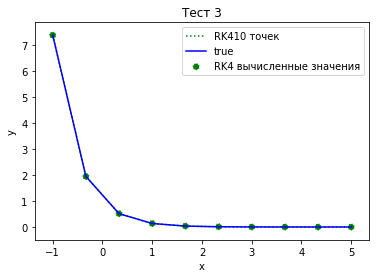

In [654]:
plot_graph("RK4", "Тест 3", -1,5,10,rk41_answers,true_answers)

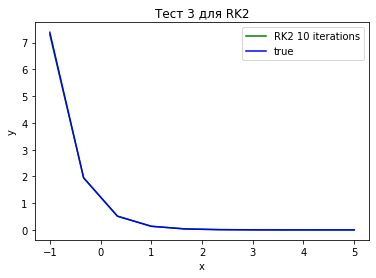

In [150]:
plt.plot( np.linspace(-1,5,10), rk21_answers, '-', color = 'green', label = "RK2 10 iterations")
plt.plot( np.linspace(-1,5,10), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 3 для RK2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

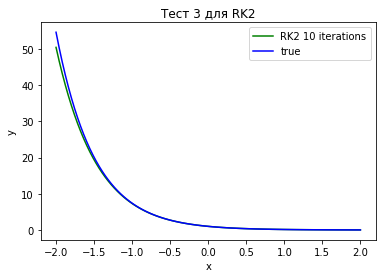

In [110]:
plt.plot( np.linspace(-2,2,100), rk21_answers, color = 'green', label = "RK2 10 iterations")
plt.plot( np.linspace(-2,2,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 3 для RK2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fig1test_3.png", dpi = 400)

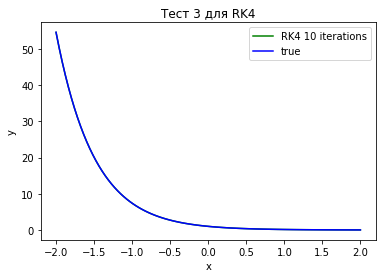

In [111]:
plt.plot( np.linspace(-2,2,100), rk41_answers, color = 'green', label = "RK4 10 iterations")
plt.plot( np.linspace(-2,2,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 3 для RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fig2test_3.png", dpi = 400)

In [154]:
rk21_answers[:5], rk41_answers[:5], true_answers[:5]

([7.3046314154279175,
  1.946819223648465,
  0.5136837420062562,
  0.13744803133596054,
  0.03861077083162306],
 [7.3888892416594585,
  1.9477338388534238,
  0.5134171785959779,
  0.1353395484305101,
  0.0356901652120435],
 [7.38905609893065,
  1.947734041054676,
  0.5134171190325921,
  0.1353352832366127,
  0.03567399334725241])

In [657]:
# y' = -2*y
# y(0) = 1
# answer = x
import math
def f_test5(x,y):
    return -(2*y + 1)*(1/math.tan(x))
def answer_test5(x):
    return (1/(math.sin(x)*math.sin(x)) - 1)/2



rk41_answers = [rk41(f_test5, 0, np.pi/2, x, 2) for x in np.linspace(1,2,10)]
rk21_answers = [rk21(f_test5, 0, np.pi/2, x, 2) for x in np.linspace(1,2,10)]
true_answers = [answer_test5(x) for x in np.linspace(1,2,100)]

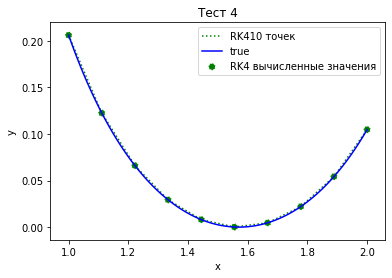

In [661]:
plot_graph("RK4", "Тест 4", 1,2,10,rk41_answers,true_answers)

In [152]:
rk21_answers[:5], rk41_answers[:5], true_answers[:5]

([0.20317290886328848,
  0.194457971694024,
  0.18602851355021563,
  0.1778753848668962,
  0.16998983747439977],
 [0.20613238094752792,
  0.19713360298617505,
  0.1884450901823442,
  0.18005569251004672,
  0.17195481446453165],
 [0.20614146371869602,
  0.1971408712364946,
  0.18845085799943506,
  0.18006022541989564,
  0.17195833628038026])

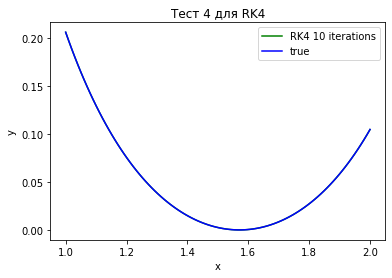

In [129]:
plt.plot( np.linspace(1,2,100), rk41_answers, color = 'green', label = "RK4 10 iterations")
plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 4 для RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fig2test_4.png", dpi = 400)

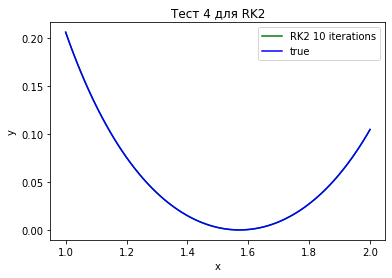

In [125]:
plt.plot( np.linspace(1,2,100), rk41_answers, color = 'green', label = "RK2 10 iterations")
plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.legend()
plt.title("Тест 4 для RK2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fig1test_4.png", dpi = 400)

In [133]:
# y' = -2*y
# y(0) = 1
# answer = x
import math
def f_test5(x,y):
    return -(2*y + 1)*(1/math.tan(x))
def answer_test5(x):
    return (1/(math.sin(x)*math.sin(x)) - 1)/2



rk41_answers = [rk41(f_test5, 0, np.pi/2, x, 2) for x in np.linspace(1,2,100)]
rk21_answers = [rk21(f_test5, 0, np.pi/2, x, 2) for x in np.linspace(1,2,100)]
true_answers = [answer_test5(x) for x in np.linspace(1,2,100)]

-2.698771981307635e-06

In [30]:

def answer_correct2(x):
    return np.exp(-x*x*(-3+2*x)/6)
def answer_test1(x): # (0,1,5/2)
    return (-np.exp(x) + 2, np.exp(2*x) + np.exp(x) + 1/2)

In [31]:
def f1_test1 (x,y,z):
    return y-2
def f2_test1(x,y,z):
    return y + 2*z - 3

In [44]:
a = [rk42(f1, f2, 0, 1, 5/2, x, 100)[0] for x in np.linspace(0,10,100)]

In [35]:
ex2(1)

(-0.7182818284590451, 10.607337927389695)

In [39]:
import matplotlib.pyplot as plt

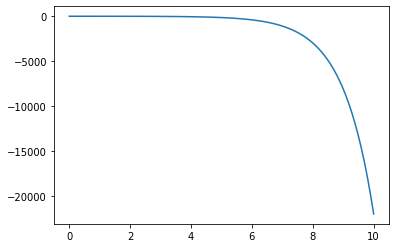

In [45]:
plt.plot(np.linspace(0,10,100), a)

In [49]:
rk22(f1, f2, 0, 1, 5/2, 1, 100)

(-0.7182368625599577, 10.60632247765224)

## Системы уравнений

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #solver
def answer_correct1(x):
    return np.exp(-x*x*(-3+2*x)/6)
def f(x,y,z):
    return math.sin(1.4*y*y) - x - z
def g(x,y,z):
    return x + y - 2.2*z*z +1
def ff(x1,x2):
    return [f(x1,x2[0],x2[1]), g(x1, x2[0], x2[1])]


In [162]:
odeint(ff,(0,1,0.5), (1,2,3))

TypeError: 'float' object is not subscriptable

In [207]:
rk42_answers = [rk42(f,g,0,1,0.5, x, 100) for x in np.linspace(-2,3,100)]
rk22_answers = [rk22(f, g, 0,1, 0.5, x, 100) for x in np.linspace(-2,3,100)]
#true_answers = [answer_test5(x) for x in np.linspace(1,2,100)]

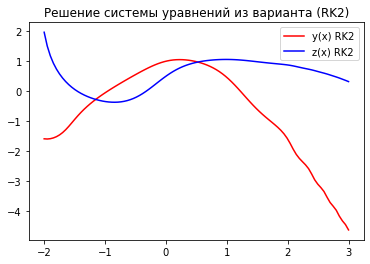

In [218]:
plt.plot( np.linspace(-2,3,100), [rk22_answers[i][0] for i in range(len(rk22_answers))], color = 'red', label = 'y(x) RK2')
plt.plot( np.linspace(-2,3,100), [rk22_answers[i][1] for i in range(len(rk22_answers))], color = 'blue', label = 'z(x) RK2')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.title("Решение системы уравнений из варианта (RK2)")
plt.legend()
plt.savefig("fig1_s.png", dpi = 400)



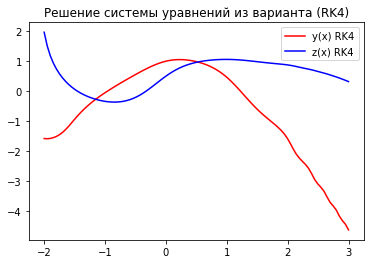

In [217]:
plt.plot( np.linspace(-2,3,100), [rk42_answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = 'y(x) RK4')
plt.plot( np.linspace(-2,3,100), [rk42_answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = 'z(x) RK4')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.title("Решение системы уравнений из варианта (RK4)")
plt.legend()
plt.savefig("fig2_s.png", dpi = 400)

In [249]:

def f_test1(x,y,z):
    return 2*y + z
def g_test1(x,y,z):
    return 3*y + 4*z
def answers_test1_y(x):
    return np.exp(x) + np.exp(5*x)
def answers_test1_z(x):
    return -np.exp(x) + 3*np.exp(5*x)
    

In [664]:
def plot_graph_v2(Label, Title, a,b,count,answers,tr_answersy, tr_answersz ):
    plt.plot( np.linspace(a,b,count), [answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = Label + "y(x) 10 точек", linestyle = 'dotted')
    plt.plot( np.linspace(a,b,count), [answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = Label + "z(x) 10 точек", linestyle = 'dotted')
    plt.scatter( np.linspace(a,b,count), [answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = Label + "y(x) вычисленные точки", linestyle = 'dotted')
    plt.scatter( np.linspace(a,b,count), [answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = Label + "z(x)  вычисленные точки", linestyle = 'dotted')
    #plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
    plt.plot( np.linspace(a,b,100), [tr_answersy(x) for x in np.linspace(a,b,100)], color = 'green', label = 'y(x) true')
    plt.plot( np.linspace(a,b,100), [tr_answersz(x) for x in np.linspace(a,b,100)], color = 'brown', label = 'z(x) true')

    plt.title(Label + Title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.savefig("NEW"+ Label+"_"+Title+"system.png", dpi = 400)

In [663]:
rk42_answers = [rk42(f_test1,g_test1,0,2,2, x, 10) for x in np.linspace(-2,1,10)]
rk22_answers = [rk22(f_test1, g_test1, 0,2, 2, x, 10) for x in np.linspace(-2,1,10)]
#true_answers = [answer_test5(x) for x in np.linspace(1,2,100)]

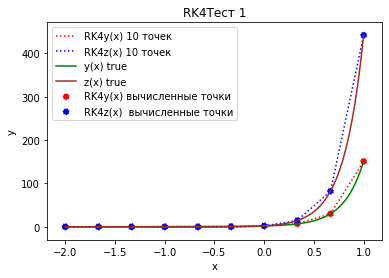

In [667]:
plot_graph_v2("RK4", "Тест 1", -2,1,10,rk42_answers,answers_test1_y,answers_test1_z)

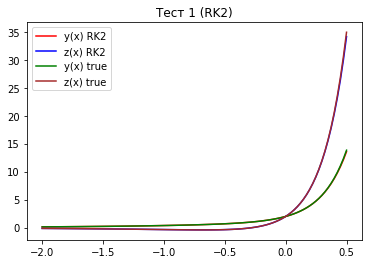

In [253]:
plt.plot( np.linspace(-2,0.5,100), [rk22_answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = 'y(x) RK2')
plt.plot( np.linspace(-2,0.5,100), [rk22_answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = 'z(x) RK2')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.plot( np.linspace(-2,0.5,100), [answers_test1_y(x) for x in np.linspace(-2,0.5,100)], color = 'green', label = 'y(x) true')
plt.plot( np.linspace(-2,0.5,100), [answers_test1_z(x) for x in np.linspace(-2,0.5,100)], color = 'brown', label = 'z(x) true')

plt.title("Тест 1 (RK2)")
plt.legend()
plt.savefig("fig_1_1s.png", dpi = 400)

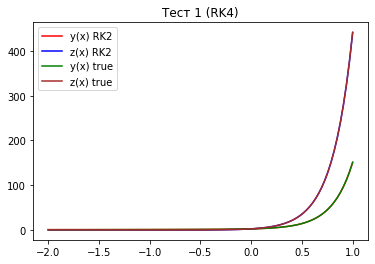

In [258]:
plt.plot( np.linspace(-2,1,100), [rk42_answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = 'y(x) RK2')
plt.plot( np.linspace(-2,1,100), [rk42_answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = 'z(x) RK2')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.plot( np.linspace(-2,1,100), [answers_test1_y(x) for x in np.linspace(-2,1,100)], color = 'green', label = 'y(x) true')
plt.plot( np.linspace(-2,1,100), [answers_test1_z(x) for x in np.linspace(-2,1,100)], color = 'brown', label = 'z(x) true')

plt.title("Тест 1 (RK4)")
plt.legend()
#plt.savefig("fig_1_2s.png", dpi = 400)

In [248]:
rk22_answers[-1][0]


(29.02288276341365, 151.13144093103566)

In [260]:
[answers_test1_y(x) for x in np.linspace(-2,1,100)][:5]

[0.1353806831663752,
 0.139551949445655,
 0.14385253896211447,
 0.1482865919793579,
 0.1528584025475848]

In [261]:
[rk22_answers[i][0] for i in range(5)]

[0.13842459383596056,
 0.14255273405425,
 0.14681275661274368,
 0.15120870943094666,
 0.15574482115464305]

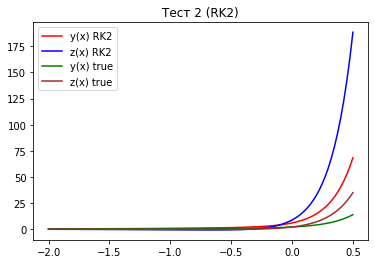

In [266]:
plt.plot( np.linspace(-2,0.5,100), [rk22_answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = 'y(x) RK2')
plt.plot( np.linspace(-2,0.5,100), [rk22_answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = 'z(x) RK2')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.plot( np.linspace(-2,0.5,100), [answers_test1_y(x) for x in np.linspace(-2,0.5,100)], color = 'green', label = 'y(x) true')
plt.plot( np.linspace(-2,0.5,100), [answers_test1_z(x) for x in np.linspace(-2,0.5,100)], color = 'brown', label = 'z(x) true')

plt.title("Тест 2 (RK2)")
plt.legend()
plt.savefig("fig_2_1s.png", dpi = 400)

In [668]:

def f_test2(x,y,z):
    return y - z
def g_test2(x,y,z):
    return z - 4*y
def answers_test2_y(x):
    return np.exp(-x) + np.exp(3*x)
def answers_test2_z(x):
    return 2*np.exp(-x) - 2*np.exp(3*x)
    

In [672]:
rk42_answers = [rk42(f_test2,g_test2,0,2,0, x, 5) for x in np.linspace(-2,0.5,10)]
rk22_answers = [rk22(f_test2, g_test2, 0,2, 0, x, 5) for x in np.linspace(-2,0.5,10)]
#true_answers = [answer_test5(x) for x in np.linspace(1,2,100)]

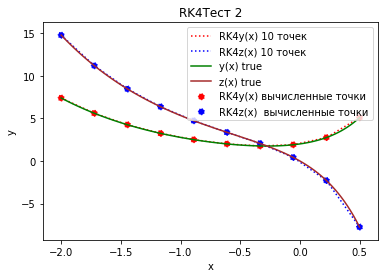

In [675]:
plot_graph_v2("RK4", "Тест 2", -2,0.5,10,rk42_answers,answers_test2_y,answers_test2_z)

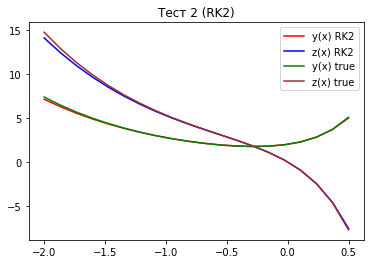

In [295]:
plt.plot( np.linspace(-2,0.5,20), [rk22_answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = 'y(x) RK2')
plt.plot( np.linspace(-2,0.5,20), [rk22_answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = 'z(x) RK2')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.plot( np.linspace(-2,0.5,20), [answers_test2_y(x) for x in np.linspace(-2,0.5,20)], color = 'green', label = 'y(x) true')
plt.plot( np.linspace(-2,0.5,20), [answers_test2_z(x) for x in np.linspace(-2,0.5,20)], color = 'brown', label = 'z(x) true')

plt.title("Тест 2 (RK2)")
plt.legend()
plt.savefig("fig_2_1s.png", dpi = 400)

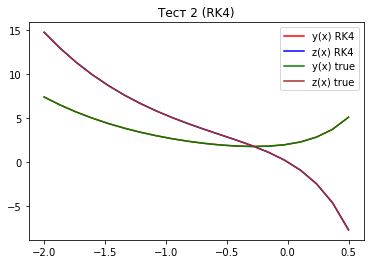

In [298]:
plt.plot( np.linspace(-2,0.5,20), [rk42_answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = 'y(x) RK4')
plt.plot( np.linspace(-2,0.5,20), [rk42_answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = 'z(x) RK4')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.plot( np.linspace(-2,0.5,20), [answers_test2_y(x) for x in np.linspace(-2,0.5,20)], color = 'green', label = 'y(x) true')
plt.plot( np.linspace(-2,0.5,20), [answers_test2_z(x) for x in np.linspace(-2,0.5,20)], color = 'brown', label = 'z(x) true')

plt.title("Тест 2 (RK4)")
plt.legend()
plt.savefig("fig_2_2s.png", dpi = 400)

In [299]:
[answers_test2_y(x) for x in np.linspace(-2,1,20)][:5]

[7.391534851107317,
 6.3137887219713,
 5.394587903228635,
 4.611459486988416,
 3.9456275667576532]

In [300]:
[rk22_answers[i][0] for i in range(5)]

[7.138841599999999,
 6.301047837082498,
 5.559321798949325,
 4.903428072908178,
 4.324409355793071]

In [676]:

def f_test3(x,y,z):
    return z  + math.tan(x)**2 - 1
def g_test3(x,y,z):
    return -y + math.tan(x)
def answers_test3_y(x):
    return math.cos(x) + math.sin(x) +math.tan(x)
def answers_test3_z(x):
    return -math.sin(x) + math.cos(x) + 2


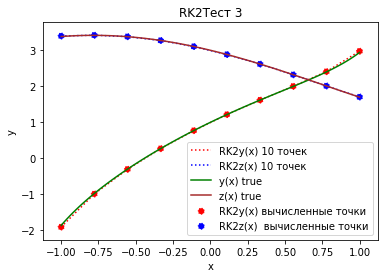

In [680]:
plot_graph_v2("RK2", "Тест 3", -1,1,10,rk22_answers,answers_test3_y,answers_test3_z)

In [677]:
rk42_answers = [rk42(f_test3,g_test3,0,1,3, x, 5) for x in np.linspace(-1,1,10)]
rk22_answers = [rk22(f_test3, g_test3, 0,1, 3, x, 5) for x in np.linspace(-1,1,10)]
#true_answers = [answer_test5(x) for x in np.linspace(1,2,100)]

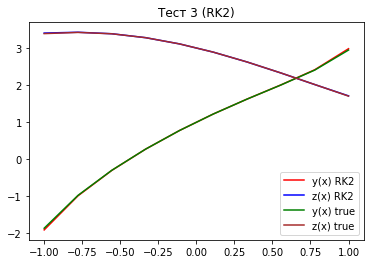

In [321]:
plt.plot( np.linspace(-1,1,10), [rk22_answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = 'y(x) RK2')
plt.plot( np.linspace(-1,1,10), [rk22_answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = 'z(x) RK2')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.plot( np.linspace(-1,1, 10), [answers_test3_y(x) for x in np.linspace(-1,1,10)], color = 'green', label = 'y(x) true')
plt.plot( np.linspace(-1,1, 10), [answers_test3_z(x) for x in np.linspace(-1,1,10)], color = 'brown', label = 'z(x) true')

plt.title("Тест 3 (RK2)")
plt.legend()
plt.savefig("fig_3_1s.png", dpi = 400)

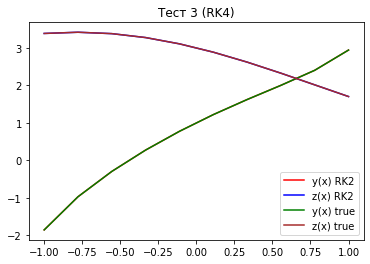

In [322]:
plt.plot( np.linspace(-1,1,10), [rk42_answers[i][0] for i in range(len(rk42_answers))], color = 'red', label = 'y(x) RK2')
plt.plot( np.linspace(-1,1,10), [rk42_answers[i][1] for i in range(len(rk42_answers))], color = 'blue', label = 'z(x) RK2')
#plt.plot( np.linspace(1,2,100), true_answers, color = 'blue', label = "true")
plt.plot( np.linspace(-1,1, 10), [answers_test3_y(x) for x in np.linspace(-1,1,10)], color = 'green', label = 'y(x) true')
plt.plot( np.linspace(-1,1, 10), [answers_test3_z(x) for x in np.linspace(-1,1,10)], color = 'brown', label = 'z(x) true')

plt.title("Тест 3 (RK4)")
plt.legend()
plt.savefig("fig_3_2s.png", dpi = 400)

In [326]:
[answers_test3_y(x) for x in np.linspace(-1,1,10)][:5]

[-1.8585764035946593,
 -0.974097452007151,
 -0.2985831182868812,
 0.27150870000801,
 0.7713802521951383]

In [324]:
[rk22_answers[i][0] for i in range(5)]

[-1.9044675512736506,
 -0.986703415307981,
 -0.30196189346501157,
 0.2709099503016036,
 0.7713609665641333]

##  Подвариант 2

In [383]:
# y'' +py' + q(x)*y = f(x) alpha0*y(a) + alpha1*y'(a) = A, 
#                          beta0*y(b) + beta1*y'(b) = B
def solver(p, q, f, alpha0, alpha1, beta0, beta1, a, b, A, B, n):
    h = (b - a)/n
    xi = a 
    x_s =[xi]
    c_s = [alpha1/(alpha0*h - alpha1)]
    d_s = [A*h/alpha1]
    m_s = [-(2-q(xi)*h*h)/(1+p(xi)*h/2)]
    n_s = [-(1 - p(xi)*h/2)/(1+p(xi)*h/2)]
    f_s = [-f(xi)/(1+p(xi)*h/2)]
    x_s = [xi]
    for i in range(1,n+1): #direct
        xi += h
        x_s.append(xi)
        #print(x_s)
        m_s.append(-(2-q(xi)*h*h)/(1+p(xi)*h/2))
        n_s.append(-(1 - p(xi)*h/2)/(1+p(xi)*h/2))
        f_s.append(-f(xi)/(1+p(xi)*h/2))
        
        
        c_s.append(1/(m_s[i] - n_s[i]*c_s[i-1]))
        d_s.append(f_s[i]*h*h - n_s[i]*c_s[i-1]*d_s[i-1])
    
    y_s = [0 for i in range(n+1)] #without y_0
    #print(y_s)
    y_s[n] = (B*h+beta1*c_s[n-1]*d_s[n-1])/(beta0*h + beta1*(c_s[n-1]+1))
    print(c_s)
    print(d_s)
    for i in range(n-1):
        j = n - 1 - i
        #k = (f_s[j]*h*h - n_s[j]*c_s[j-1]*d_s[j-1])
        #y_s[j] = (k - y_s[j+1])/(m_s[j] - n_s[j]*c_s[j-1])
        y_s[j] = c_s[j]*(d_s[j] - y_s[j+1])
    y_s[0] = (A*h - alpha1*y_s[1])/(alpha0*h - alpha1)   
    return y_s, x_s
    

In [348]:
def p(x):
    return 1
def q(x):
    return 0
def f(x):
    return 1
y, x = solver(p,q,f,0,1,1,0,0,1,0,1,10)

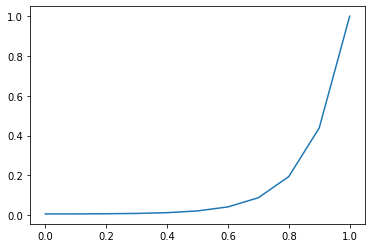

In [349]:
plt.plot(x,y)

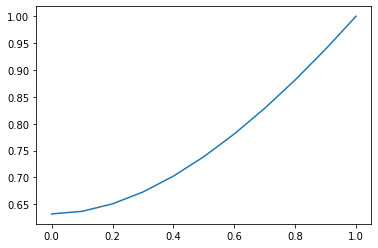

In [350]:
plt.plot(x,[(i + np.exp(-i)-np.exp(-1)) for i in x])

In [384]:
def p(x):
    return -4
def q(x):
    return -2
def f(x):
    return -4*x
# p, q, f, alpha0, alpha1, beta0, beta1, a, b, A, B, n
y, x = solver(p, q, f, 1, -1,  1,0,  0,3,  0, 1, 3)

[-0.5, 0.18181818181818182, 0.2894736842105263, 0.31932773109243695]
[-0.0, -4.0, -5.818181818181818, -6.947368421052631]


In [382]:
y

[-0.18421052631578946, -0.3684210526315789, -1.973684210526316, 1.0]

In [373]:
x

[0, 1.0, 2.0, 3.0]

In [385]:
tr = np.linalg.inv(np.array([[2,-1,0,0], [3,-4,-1,0], [0,3,-4,-1], [0,0,0,1]])).dot(np.array([0,-4,-8,1]).reshape(-1,1))

In [391]:
tr

array([[0.34615385],
       [0.69230769],
       [2.26923077],
       [1.        ]])

In [395]:
(0.69230769*11/2) + 4

7.807692295000001

In [396]:
0.18181818181818182*(-4-0.69230769)

-0.8531468527272728

In [476]:
# a - up
# b - mid
# c , f - right
def pure_progonka(a,b,c,f):
    n = len(b)
    #print(a,b,c)
    alphas = [-a[0]/b[0]]
    betas = [f[0]/b[0]]
    for i in range(1,n-1):
        alphas.append(-a[i]/(b[i]+ c[i-1]*alphas[i-1]))
        betas.append((-c[i-1]*betas[i-1] + f[i])/(b[i] + c[i-1]*alphas[i-1]))
    x = [0]*n
    x[n-1] = (-c[n-2]*betas[n-2] + f[n-1])/(b[n-1] + c[n-2]*alphas[n-2])
    for i in range(2, n + 1):
        j =  n - i
        x[j] = alphas[j]*x[j+1] + betas[j]
    return x
# y'' + p(x)y' + q(x)*y = f(x)
# alpha1*y(a) + beta1*y'(a) = gamma1
# alpha2*y(b) + beta2*y'(b) = gamma2
# [A, B], n - count
def make_arrays(p, q, f, alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n):
    h = (B-A)/n
    a = [0]*n
    b = [0]*(n + 1)
    c = [0]*n
    d = [0]*(n + 1)
    b[0] = (alpha1 - beta1/h)
    c[0] = beta1/h
    a[-1] = -beta2/h
    b[-1] = (beta2/h + alpha2)
    d[0] = gamma1
    d[-1] = gamma2
    x = A + h
    for i in range(1, n):
        d[i] = f(x)
        a[i-1] = 1/(h*h) - p(x)/(2*h) 
        b[i] = q(x) - 2/(h*h)
        c[i] = 1/(h*h) + p(x)/(2*h)
        d[i] = f(x)
        #print(x, f(x))
        x += h
    return c,b,a,d
def main_alpgoritm(p, q, f, alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n):
    re = make_arrays(p, q, f, alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n)
    return pure_progonka(re[0], re[1], re[2], re[3])

    

In [445]:
A = np.array([[1,1,0,0],[3,6,5,0],[0,6,7,9],[0,0,10,8]])

In [446]:
a = [1,6,7,8]
b = [1,5,9]
c = [3,6,10]

In [447]:
pure_progonka(b,a,c,[1,1,1,1])

[1.213450292397661,
 -0.21345029239766083,
 -0.27192982456140347,
 0.46491228070175444]

In [448]:
np.linalg.inv(A).dot(np.array([1,1,1,1]).reshape(-1,1))

array([[ 1.21345029],
       [-0.21345029],
       [-0.27192982],
       [ 0.46491228]])

In [421]:
A

array([[ 1,  2,  0,  0],
       [ 3,  4,  5,  0],
       [ 0,  6,  7,  9],
       [ 0,  0, 10,  8]])

In [533]:
def p(x):
    return 0
def q(x):
    return -1
def f(x):
    return  2*x

In [452]:
# alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n
res1 = main_alpgoritm(p, q, f,  1,0,1,0,0,-1,0,1,10)

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999


In [527]:
def sh(x):
    return (np.exp(x) - np.exp(-x))/2

In [528]:
def answ(x):
    return  ((sh(x)/sh(1)) - 2*x)

In [451]:
answ(0 + 2/10)

-0.228679545570545

In [529]:
n = 10
a = 0
b = 1
true = [answ(i*(b - a)/n) for i in range(n + 1)]

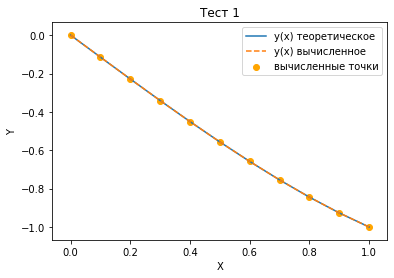

In [536]:
plt.plot([i*(b - a)/n for i in range(n + 1)], true, label = "y(x) теоретическое")
k = 10
plt.plot([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f,  1,0,1,0,0,-1,0,1, k), label = "y(x) вычисленное",linestyle='dashed')
plt.scatter([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f,  1,0,1,0,0,-1,0,1, k), label = "вычисленные точки", color = 'orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Тест 1")
plt.legend()
plt.savefig("fig_progonka1.png", dpi = 400)

In [544]:
def p(x):
    return -1
def q(x):
    return  0
def f(x):
    return 0
def answ(x):
    return np.exp(x) - 2

In [545]:
n = 10
a = 0
b = 1
true = [answ(i*(b - a)/n) for i in range(n + 1)]

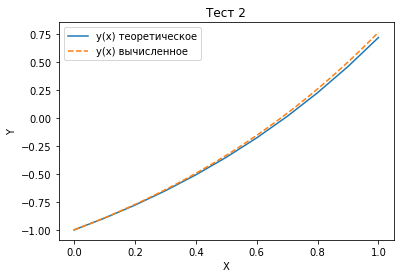

In [546]:
# alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n

plt.plot([i*(b - a)/n for i in range(n + 1)], true , label = "y(x) теоретическое")
k = 50
plt.plot([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f,  1,0, -1,1, -1,2, 0,1, k) , label = "y(x) вычисленное",linestyle='dashed')
#plt.scatter([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f,  1,0, -1,1, -1,2, 0,1, k), label = "вычисленные точки", color = 'orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Тест 2")
plt.legend()
plt.savefig("fig_progonka2.png", dpi = 400)

In [487]:
make_arrays(p, q, f,  1,0, 1,-1, -1,2, 0,1, k - 2)

([0.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0],
 [1.0, -128.0, -128.0, -128.0, -128.0, -128.0, -128.0, -128.0, -7.0],
 [68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 68.0, 8.0],
 [-1, 0, 0, 0, 0, 0, 0, 0, 2])

In [541]:
def p(x):
    return 1
def q(x):
    return  0
def f(x):
    return 1
def answ(x):
    return np.exp(-x) + x - np.exp(-1)

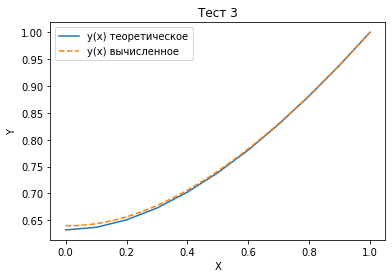

In [547]:
def p(x):
    return 1
def q(x):
    return  0
def f(x):
    return 1
def answ(x):
    return np.exp(-x) + x - np.exp(-1)
n = 10
a = 0
b = 1
true = [answ(i*(b - a)/n) for i in range(n + 1)]
# alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n

plt.plot([i*(b - a)/n for i in range(n + 1)], true , label = "y(x) теоретическое")
k = 40
plt.plot([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f,  0,1, 1,0, 0,1, 0,1, k), label = "y(x) вычисленное",linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Тест 3")
plt.legend()
plt.savefig("fig_progonka3.png", dpi = 400)

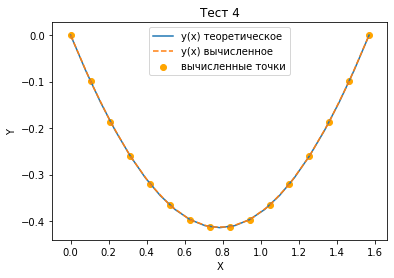

In [551]:
def p(x):
    return 0
def q(x):
    return 1
def f(x):
    return 1
def answ(x):
    return 1 - math.sin(x) - math.cos(x)
n = 20
a = 0
b = math.pi/2
true = [answ(i*(b - a)/n) for i in range(n + 1)]
# alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n

plt.plot([i*(b - a)/n for i in range(n + 1)], true, label = "y(x) теоретическое")
k = 15
plt.plot([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f, 1,0 , 1,0, 0,0 , 0,math.pi/2, k), label = "y(x) вычисленное",linestyle='dashed')
plt.scatter([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f, 1,0 , 1,0, 0,0 , 0,math.pi/2, k), color = 'orange', label = "вычисленные точки")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Тест 4")
plt.legend()
plt.savefig("fig_progonka4.png", dpi = 400)

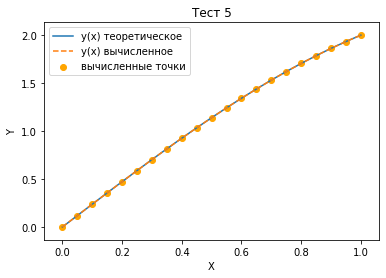

In [552]:
def p(x):
    return 0
def q(x):
    return 1
def f(x):
    return 0
def answ(x):
    return 2*math.sin(x)/math.sin(1)
n = 20
a = 0
b = 1
true = [answ(i*(b - a)/n) for i in range(n + 1)]
# alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n

plt.plot([i*(b - a)/n for i in range(n + 1)], true, label = "y(x) теоретическое")
k = 20
plt.plot([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f, 1,0 , 1,0, 0,2 , 0, 1, k), label = "y(x) вычисленное",linestyle='dashed')
plt.scatter([i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f, 1,0 , 1,0, 0,2 , 0, 1, k), color = 'orange', label = "вычисленные точки")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Тест 5")
plt.legend()
plt.savefig("fig_progonka5.png", dpi = 400)

# Решение уравнения из варианта

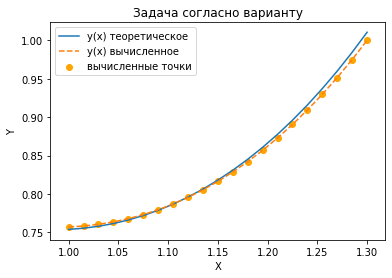

In [635]:
def p(x):
    return -0.5
def q(x):
    return -3
def f(x):
    return 2*x*x
def answ(x):
    return (-2*x*x/3 + 2*x/9 + 2.92095*np.exp(-3*x/2) + 0.1458605*np.exp(2*x) - 0.531081)
n = 20
a = 1
b = 1.3
true = [answ(a + i*(b - a)/n) for i in range(n + 1)]
# alpha1, beta1, alpha2, beta2, gamma1, gamma2, A, B, n

plt.plot([a + i*(b - a)/n for i in range(n + 1)], true, label = "y(x) теоретическое")
k = 20
plt.plot([a + i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f, 1,-2 , 1,0, 0.6,1 ,  1, 1.3, k), label = "y(x) вычисленное",linestyle='dashed')
plt.scatter([a + i*(b - a)/k for i in range(k + 1)], main_alpgoritm(p, q, f, 1,-2 , 1,0, 0.6,1 , 1, 1.3, k), color = 'orange', label = "вычисленные точки")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Задача согласно варианту")
plt.legend()
plt.savefig("fig_progonka_res.png", dpi = 400)

In [625]:
def answ(x):
    return (-2*x*x/3 + 2*x/9 + 2.90095*np.exp(-3*x/2) + 0.1458605*np.exp(2*x) - 0.481081)
def answ_(x):
    return (-4*x/3 + 2/9 - 3*2.90095*np.exp(-3*x/2)/2 + 2*0.148605*np.exp(2*x))

In [626]:
answ(1) - 2*answ_(1)

0.5714232208998454

In [627]:
answ(1.3)

1.057698751845483